# ĐỒ ÁN CUỐI KỲ: PHÂN TÍCH CẢM XÚC & ĐÁNH GIÁ ĐIỆN THOẠI DI ĐỘNG
**Môn học:** CSC17104 – Lập trình cho Khoa học Dữ liệu  
**Khoa:** Công nghệ Thông tin - ĐH KHTN, ĐHQG-HCM

**Danh sách thành viên:**
- Nguyễn Huy Hoàng - 23122031
- Trần Tạ Quang Minh - 23122042
- Nguyễn Bá Nam - 23122043

---

## 1. Giới thiệu
Dự án này phân tích bộ dữ liệu "Mobile Reviews Sentiment" để tìm hiểu về sự hài lòng của khách hàng và các yếu tố ảnh hưởng đến đánh giá điện thoại.

**Quy trình thực hiện:**
1. Thu thập dữ liệu
2. Khám phá dữ liệu
3. Đặt câu hỏi phân tích
4. Phân tích và mô hình hóa
5. Kết luận


## 1. Thu thập dữ liệu

### Chủ đề dữ liệu là gì?

Dataset này cung cấp thông tin về đánh giá của người dùng về điện thoại di động. Nó chứa thông tin từ khách hàng thực tế sau khi mua và dùng điện thoại, bao gồm cả điểm số và review text.

### Nguồn gốc dữ liệu?

- **Nền tảng:** Kaggle
- **Link:** https://www.kaggle.com/datasets/mohankrishnathalla/mobile-reviews-sentiment-and-specification
- **Tác giả:** Mohankrishna Thalla

### Giấy phép sử dụng?

Dataset này có giấy phép CC0: Public Domain, nghĩa là được phép dùng tự do cho mục đích giáo dục.

### Dữ liệu được thu thập như thế nào?

Dữ liệu được thu thập từ các trang bán hàng như Amazon, Flipkart, v.v. từ người tiêu dùng ở nhiều quốc gia.

### Tại sao chọn dataset này?

- Dataset có đủ dữ liệu để phân tích (50000 dòng, 25 cột)
- Có cả dữ liệu số và text nên có thể áp dụng nhiều kỹ thuật phân tích
- Dữ liệu thực tế từ người dùng nên có ý nghĩa thực tế
- Có thể phân tích cảm xúc và xây dựng mô hình dự đoán


### 2.2 Khám phá dữ liệu
Bước này sẽ kiểm tra cấu trúc, chất lượng và các đặc điểm chính của dữ liệu.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Mobile Reviews Sentiment.csv')
print(df.head())


   review_id      customer_name  age     brand          model  price_usd  \
0          1      Aryan Maharaj   45    Realme  Realme 12 Pro     337.31   
1          2  Davi Miguel Sousa   18    Realme  Realme 12 Pro     307.78   
2          3        Pahal Balay   27    Google        Pixel 6     864.53   
3          4       David Guzman   19    Xiaomi  Redmi Note 13     660.94   
4          5          Yago Leão   38  Motorola        Edge 50     792.13   

  price_local currency  exchange_rate_to_usd  rating  ... verified_purchase  \
0   ₹27996.73      INR                 83.00       2  ...              True   
1   R$1754.35      BRL                  5.70       4  ...              True   
2   ₹71755.99      INR                 83.00       4  ...              True   
3  د.إ2425.65      AED                  3.67       3  ...             False   
4   R$4515.14      BRL                  5.70       3  ...              True   

  battery_life_rating camera_rating performance_rating design_rating

#### **Tổng quan Dataset**


In [24]:
print("Số dòng:", df.shape[0])
print("Số cột:", df.shape[1])
print("\nCác cột trong dataset:")
print(df.columns.tolist())
print("\nKiểu dữ liệu:")
df.info()


Số dòng: 50000
Số cột: 25

Các cột trong dataset:
['review_id', 'customer_name', 'age', 'brand', 'model', 'price_usd', 'price_local', 'currency', 'exchange_rate_to_usd', 'rating', 'review_text', 'sentiment', 'country', 'language', 'review_date', 'verified_purchase', 'battery_life_rating', 'camera_rating', 'performance_rating', 'design_rating', 'display_rating', 'review_length', 'word_count', 'helpful_votes', 'source']

Kiểu dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   review_id             50000 non-null  int64  
 1   customer_name         50000 non-null  object 
 2   age                   50000 non-null  int64  
 3   brand                 50000 non-null  object 
 4   model                 50000 non-null  object 
 5   price_usd             50000 non-null  float64
 6   price_local           50000 non-null  obj

#### **Kiểm tra chất lượng dữ liệu**


In [25]:
print("Số dòng bị trùng lặp:", df.duplicated().sum())

print("\nSố lượng giá trị bị thiếu trong mỗi cột:")
print(df.isnull().sum())


Số dòng bị trùng lặp: 0

Số lượng giá trị bị thiếu trong mỗi cột:
review_id               0
customer_name           0
age                     0
brand                   0
model                   0
price_usd               0
price_local             0
currency                0
exchange_rate_to_usd    0
rating                  0
review_text             0
sentiment               0
country                 0
language                0
review_date             0
verified_purchase       0
battery_life_rating     0
camera_rating           0
performance_rating      0
design_rating           0
display_rating          0
review_length           0
word_count              0
helpful_votes           0
source                  0
dtype: int64


#### **Thống kê mô tả**


In [26]:
print(df.describe())


          review_id           age     price_usd  exchange_rate_to_usd  \
count  50000.000000  50000.000000  50000.000000          50000.000000   
mean   25000.500000     30.075220    689.693713             12.057946   
std    14433.901067      8.931307    310.307331             26.553332   
min        1.000000     18.000000    180.020000              0.780000   
25%    12500.750000     23.000000    450.792500              1.000000   
50%    25000.500000     29.000000    637.040000              1.530000   
75%    37500.250000     36.000000    900.975000              5.700000   
max    50000.000000     65.000000   1499.890000             83.000000   

             rating  battery_life_rating  camera_rating  performance_rating  \
count  50000.000000          50000.00000   50000.000000        50000.000000   
mean       3.123120              2.71800       2.717640            2.719620   
std        1.248612              1.34827       1.345001            1.349208   
min        1.000000       

#### **Phân phối các biến quan trọng**


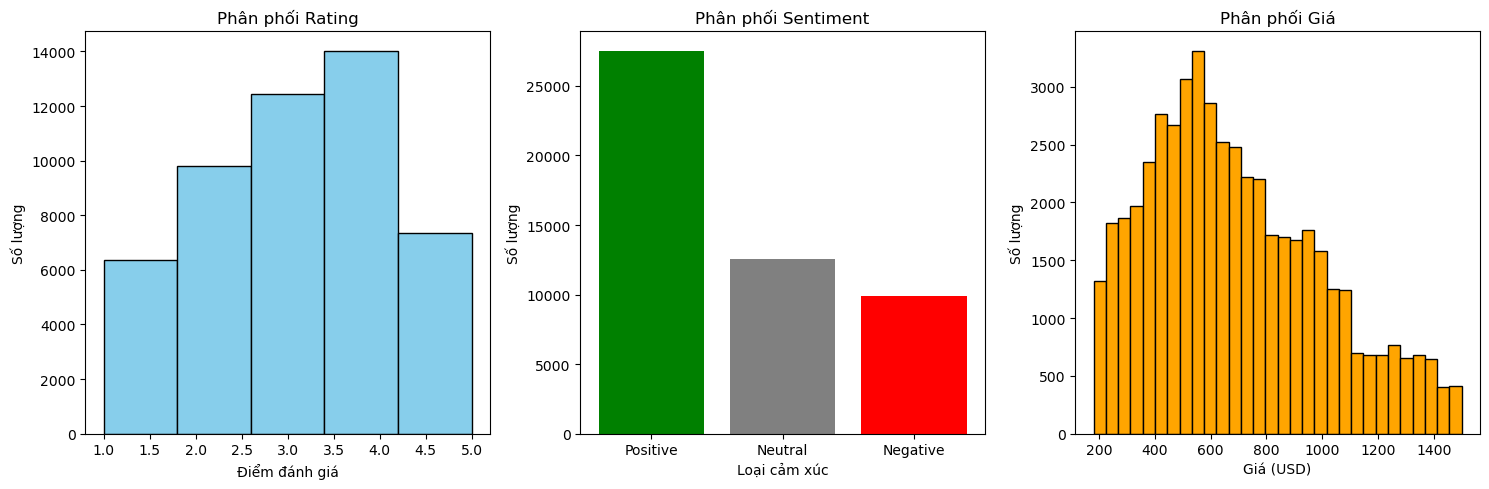

In [28]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['rating'], bins=5, color='skyblue', edgecolor='black')
plt.title('Phân phối Rating')
plt.xlabel('Điểm đánh giá')
plt.ylabel('Số lượng')

plt.subplot(1, 3, 2)
sentiment_counts = df['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'gray', 'red'])
plt.title('Phân phối Sentiment')
plt.xlabel('Loại cảm xúc')
plt.ylabel('Số lượng')

plt.subplot(1, 3, 3)
plt.hist(df['price_usd'], bins=30, color='orange', edgecolor='black')
plt.title('Phân phối Giá')
plt.xlabel('Giá (USD)')
plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()


#### **Phân tích theo Hãng**


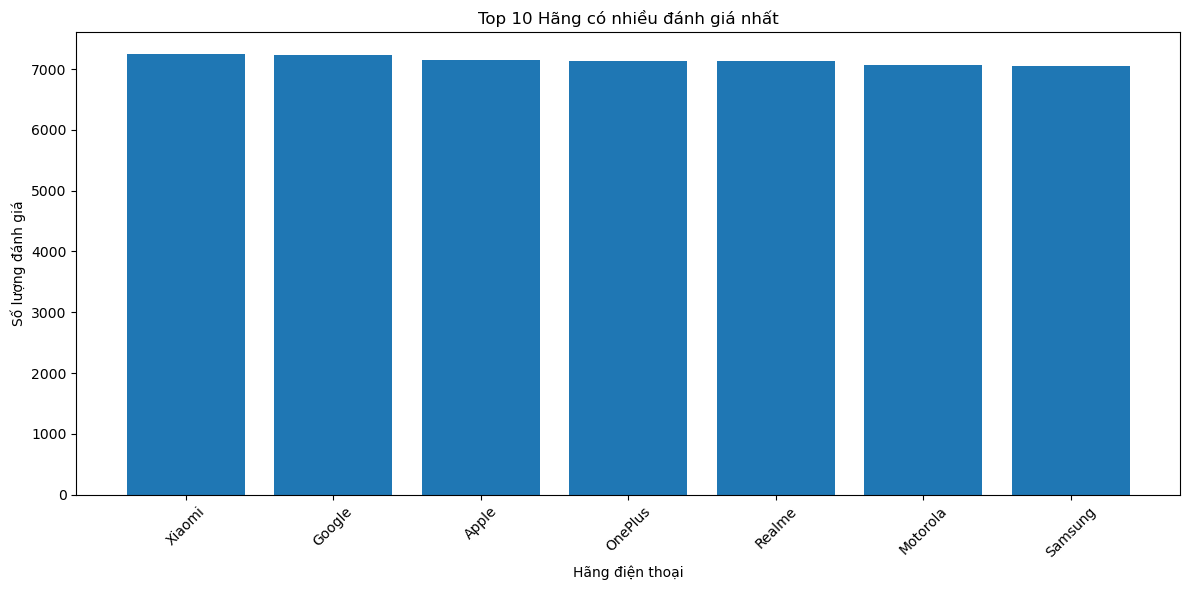

In [29]:
top_brands = df['brand'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(range(len(top_brands)), top_brands.values)
plt.xticks(range(len(top_brands)), top_brands.index, rotation=45)
plt.title('Top 10 Hãng có nhiều đánh giá nhất')
plt.xlabel('Hãng điện thoại')
plt.ylabel('Số lượng đánh giá')
plt.tight_layout()
plt.show()


#### **Tương quan giữa các thông số**


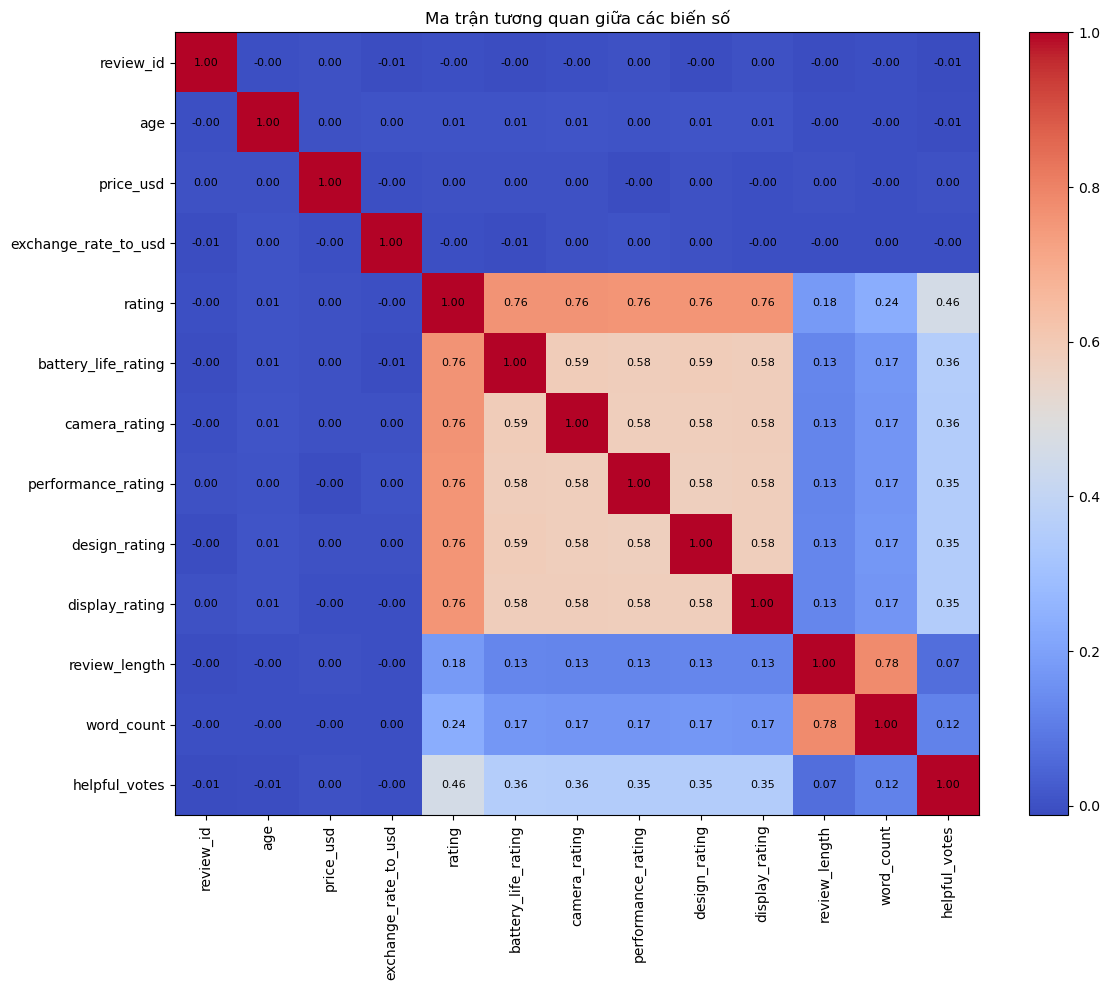

In [30]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Ma trận tương quan giữa các biến số')

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()


## 3. Nhận xét sơ bộ

### **3.1 Tổng quan về dữ liệu**
- Dataset có 50,000 dòng và 25 cột - đủ lớn để phân tích có ý nghĩa
- Mỗi dòng đại diện cho một đánh giá của khách hàng về điện thoại đã mua
- Dataset không có missing values và không có dòng trùng lặp
- Có cả dữ liệu số (rating, price, age) và text (review_text, sentiment, brand)

### **3.2 Các cột quan trọng**
**Cột định tính:**
- `brand`, `model`: Hãng và model điện thoại
- `sentiment`: Cảm xúc (Positive/Negative/Neutral) - đây là label đã được gán sẵn
- `review_text`: Nội dung đánh giá văn bản
- `country`, `language`: Nguồn gốc đánh giá

**Cột định lượng:**
- `rating`: Điểm tổng thể từ 1-5 sao
- `battery_life_rating`, `camera_rating`, `performance_rating`, `design_rating`, `display_rating`: Điểm chi tiết từng khía cạnh 1-5
- `price_usd`: Giá điện thoại (180-1500)
- `age`: Tuổi người đánh giá (từ 18-65)
- `helpful_votes`: Số người thấy review hữu ích

### **3.3 Phân phối dữ liệu**

**Rating (1-5 sao):**
- Trung bình: 3.12 - hơi thấp hơn điểm giữa
- Phân phối không đều: có nhiều đánh giá 1-2 sao và 4-5 sao
- Ít đánh giá 3 sao (trung lập) hơn -> khách hàng có xu hướng đánh giá tiêu cực, cực đoan

**Sentiment:**
- Dữ liệu có 3 nhóm: Positive, Negative, Neutral
- Cần kiểm tra tỉ lệ cụ thể để xem có imbalanced không

**Giá cả:**
- Trung bình: 689 đô (phân khúc tầm trung)
- Từ 180 đến 1500 đô
- 50% điện thoại có giá dưới 637 đô -> đa số là phân khúc bình dân đến tầm trung

**Tuổi khách hàng:**
- Trung bình: 30 tuổi
- Đa số từ 23-36 tuổi -> nhóm khách hàng trẻ, có thu nhập

### **3.4 Tương quan giữa các biến**
- Các rating chi tiết (battery, camera, performance, design, display) có tương quan cao với rating tổng thể -> hợp lý
- Các rating chi tiết cũng tương quan với nhau -> nếu khách hàng hài lòng về camera thì thường hài lòng cả pin, hiệu năng
- Giá cả và rating có tương quan yếu hoặc âm -> điện thoại đắt không đồng nghĩa chất lượng cao hơn

### **3.5 Những vấn đề cần xử lý**
1. Không có vấn đề về chất lượng dữ liệu - dataset rất sạch
2. Cần kiểm tra phân phối sentiment để xem có cần cân bằng dữ liệu không
3. Có thể cần group các brand nhỏ thành "Others" nếu có quá nhiều hãng
4. Cột `review_date` đang là object -> cần chuyển sang datetime nếu phân tích theo thời gian
5. Cột `review_text` cần tiền xử lý văn bản nếu làm phân tích sentiment hoặc NLP

### **3.6 Các hướng phân tích tiềm năng**
1. **Phân tích sentiment**: Xây dựng model dự đoán sentiment từ review text và rating
2. **So sánh thương hiệu**: Hãng nào có rating cao nhất? Giá trung bình?
3. **Phân tích giá**: Yếu tố nào ảnh hưởng đến giá? Rating có liên quan đến giá?
4. **Phân tích khách hàng**: Độ tuổi nào hay đánh giá tích cực/tiêu cực nhất?
5. **Phân tích theo quốc gia**: Thị trường nào khắt khe nhất?


---

## 4. Câu hỏi nghiên cứu


## 5. Phân tích dữ liệu

*Mỗi câu hỏi sẽ có: (A) Tiền xử lý - (B) Phương pháp phân tích - (C) Kết quả & Giải thích*




## 6. Tổng kết dự án

### **6.1 Những phát hiện chính**

### **6.2 Hạn chế**

### **6.3 Hướng phát triển trong tương lai**
---

## 7. Self-reflection

### **Thành viên 1: Nguyễn Huy Hoàng**

### **Thành viên 2: Trần Tạ Quang Minh**

### **Thành viên 3: Nguyễn Bá Nam**